# Quantifying a Summer of Learning

#### Jonah Spear

*Author's Note: This is a modified version of the presentation I gave on the last day of my summer internship at [Tulip](https://tulip.co/). Be warned, the entire contents of this presentation are completely impractical, but nevertheless I think they're cool and thought that others might feel the same!*

It was 8PM, the night before my final intern presentation, and tomorrow I would have to stand in front of my entire company and show everyone the culmination of all of my summer's work. I was planning on doing a demo of my main project, a scheduling feature for Tulip's manufacturing app platform, but something about that felt wrong. 

This summer had been the most intense period of learning that I could recall. I mean that literally. All the other comparable times happened before I had the ability to form episodic memories. It was my first summer doing web programming, and my 5 years of programming in languages like Python, Java, and Haskell left me **completely unprepared** for the convoluted, crazy world that is modern web programming.

The hardest thing I did this summer was learning **how to be a web programmer**. The scheduler I wrote was simply a result of all that learning, not the learning itself. 

This was the problem I was contemplating at 8 o'clock on the night before my final presentation. And then an idea occured to me: What if there was a way to quantify learning? If there was some way to put into a numbers all the things that I had learned this summer, maybe I could present *that*. It seemed almost impossible, but I was determined to find out.

## Google Searches

The first metric that occurred to me is Google Searches. As a programmer, Google is arguable my most useful tool. The Hypothesis is that as I learned more, I would stop having to look up answers on Google every 5 seconds. Turns out you can download all the searches you've ever done from Chrome as a JSON file. My brain is split about 50/50 on whether this is crazy scary or crazy cool. Probably both.

In [1]:
import json
from datetime import datetime, timedelta

raw_data = []

with open('search_hist_july_to_sept.json') as json_data:
    raw_data += json.load(json_data)['event']
    
with open('search_hist_april_to_june.json') as json_data:
    raw_data += json.load(json_data)['event']
    
query_timestamps = []
epoch = datetime(1970, 1, 1)
tulip_start_date = datetime(year=2017, month=5, day=22)
    
for search_query in raw_data:
    search_timestamp_usec = int(search_query['query']['id'][0]['timestamp_usec'])
    # Convert from UTC microseconds since epoch to Eastern Time.
    search_datetime = search_datetime = epoch + timedelta(microseconds=search_timestamp_usec, hours=-4)
    if search_datetime > tulip_start_date: query_timestamps.append(search_datetime)
        
print 'I did a lot of Google searches this summer.', str(len(query_timestamps)) + ', to be exact.'

I did a lot of Google searches this summer. 4169, to be exact.


The parsing was pretty easy, but would I find a trend?

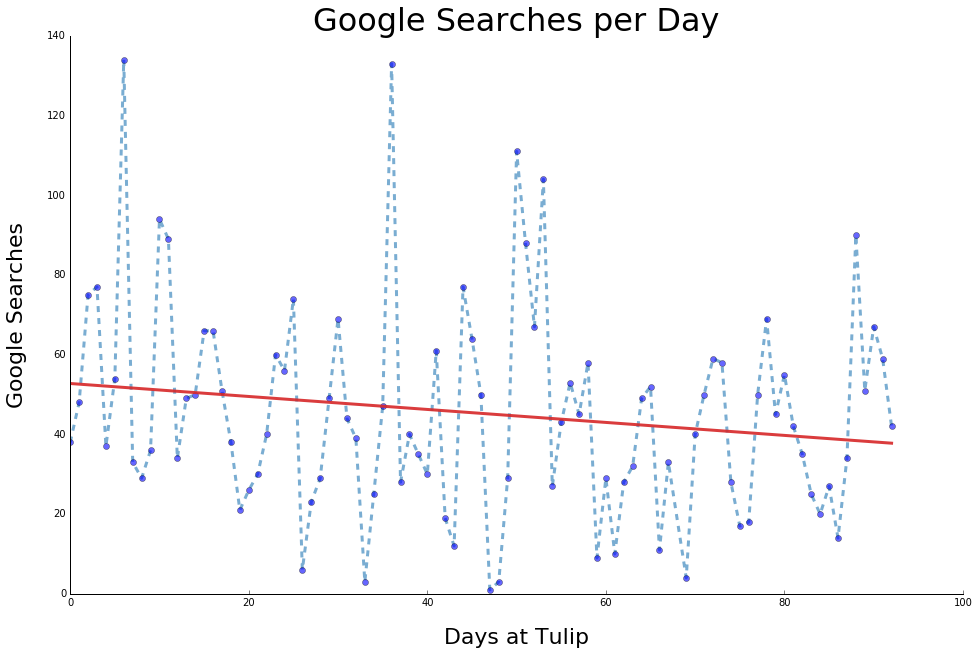

In [7]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Filter only by approximately the time I was at work
working_timestamps = [t for t in query_timestamps if t.hour > 10 and t.hour <= 20]
day_of_year = [t.timetuple().tm_yday for t in working_timestamps]
days_worked = max(day_of_year) - min(day_of_year)
start_day = min(day_of_year)

# Group the dates by day
day_frequencies = defaultdict(int)
for d in query_timestamps:
    day_frequencies[d.timetuple().tm_yday - start_day] += 1
days= [day for day in day_frequencies]
frequencies = [day_frequencies[day] for day in days]

# Create a line of best fit
fit = np.polyfit(days,frequencies,1)
fit_fn = np.poly1d(fit)

# fancy tableau colors
blue = (33/255., 119/255., 180/255.)
red = (214/255., 39/255., 40/255.)

# Plot it
ax = plt.subplot(111)
ax.plot(days, frequencies, color=blue, linestyle='dashed', marker='o', 
        alpha=0.6, linewidth=3, markerfacecolor='blue')
ax.plot(days, fit_fn(days), color=red, linestyle='solid',
        alpha=0.9, linewidth=3)
plt.xlabel('Days at Tulip', size=22, labelpad=20)
plt.ylabel('Google Searches', size=22, labelpad=20)
plt.title('Google Searches per Day', size=32)
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.axes().xaxis.set_ticks_position('bottom')
plt.axes().yaxis.set_ticks_position('none')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

Although there was a downward trend, the effect size was not quite as large as I hoped. I was looking for something clear, something definintive. Something I could pont to and say **this** is what learning looks like. And this graph was not it. After mulling this graph over some more, it started to make more sense why there wasn't a bigger trend - when I started out at Tulip, I had to constantly get help from my mentor because *I didn't even know what questions to ask.* Self-learning requires a certain amount of base knowledge that I simply didn't have. However, as I learned more and grew more comfortable in a web environment, I was able to leap-frog my learning and seek out my own answers. This data din't seem helpful, but I realized that it was useful for something else. Quantitatively proving my lack-of-sleep schedule this summer.

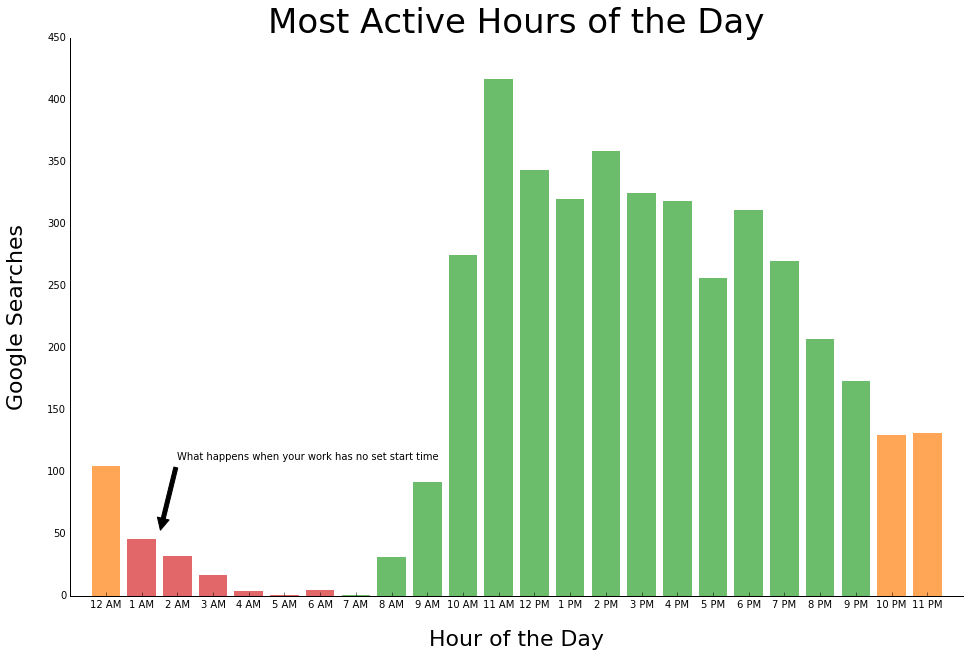

In [3]:
# Group the dates by hours
hour_frequencies = defaultdict(int)
for d in query_timestamps:
    hour_frequencies[d.hour] += 1
hours = [hour for hour in hour_frequencies]
frequencies = [hour_frequencies[hour] for hour in hours]

hour_labels_AM = ['12 AM'] + [str(h) + ' AM' for h in hours[1:12]]
hour_labels_PM = ['12 PM'] + [str(h % 12) + ' PM' for h in hours[13:]]
hour_labels = hour_labels_AM + hour_labels_PM

# fancy tableau colors
grey = (127/255., 127/255., 127/255.)
green = (44/255., 160/255., 44/255.)
orange = (255/255., 127/255., 14/255.)
red = (214/255., 39/255., 40/255.)

# plot it
ax2 = plt.subplot(111)
ax2.bar(hours[1:7], frequencies[1:7], color=red, align='center', alpha=0.7, linewidth=0)
ax2.bar(hours[7:22], frequencies[7:22], color=green, align='center', alpha=0.7, linewidth=0)
ax2.bar([hours[0]] + hours[22:],[frequencies[0]] +  frequencies[22:], 
        color=orange, align='center', alpha=0.7, linewidth=0)
plt.xlabel('Hour of the Day', size=22, labelpad=20)
plt.ylabel('Google Searches', size=22, labelpad=20)
plt.title('Most Active Hours of the Day', size=34)
ax2.annotate('What happens when your work has no set start time', xy=(1.5, 50), xytext=(2, 110),
            arrowprops=dict(facecolor='black', shrink=0.05))
# misc formatting
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.axes().xaxis.set_ticks_position('bottom')
plt.axes().yaxis.set_ticks_position('none')
plt.xlim([-1, len(hours)])
ax2.set_xticklabels(hour_labels)
ax2.set_xticks(hours)
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

The numbers don't lie, folks.

## Note Data


After my first day at Tulip, I started keeping a pen and paper notebook where I'd write down every new thing I'd learn, as a sort of external storage drive for my brain. Turns out, I was learning faster than I could write, so I quickly moved to a google doc where I've been writing notes down almost every day since. By the end of my time at Tulip, these notes had grown into a giant encyclopedia totaling just under 100 pages. Luckily for me, every day's notes has a header at the top with the day's date, which made parsing super easy! It felt like at the beginning of my internship I was writing pages of pages of data a day, whereas by the end I would barely write anything. Google searches weren't very helpful on their own, but I was hoping that when combined with my notes data it would tell a more powerful story.

In [4]:
import re

note_data = []

with open('Tulip Notes.txt') as f:
    note_data=f.read().replace('\n', ' ')
    
matches = []
start_positions = []
end_positions = []

# Find all strings of the format 01/23/45
for m in re.finditer(r"[^\d]\d\d\/\d+\/\d+", note_data):
    start_positions.append(m.start())
    end_positions.append(m.end())
    matches.append(m.group(0))

dates = [datetime.strptime(m.strip(), r'%m/%d/%y').timetuple().tm_yday - start_day for m in matches]
# length of the contents of each note
note_content_lengths = [s - e for (e, s) in zip(end_positions[:-1], start_positions[1:])]
# add the last entry
note_content_lengths.append(len(note_data) - end_positions[-1])
print sum(note_content_lengths), 'characters worth of notes written'


85705 characters worth of notes written


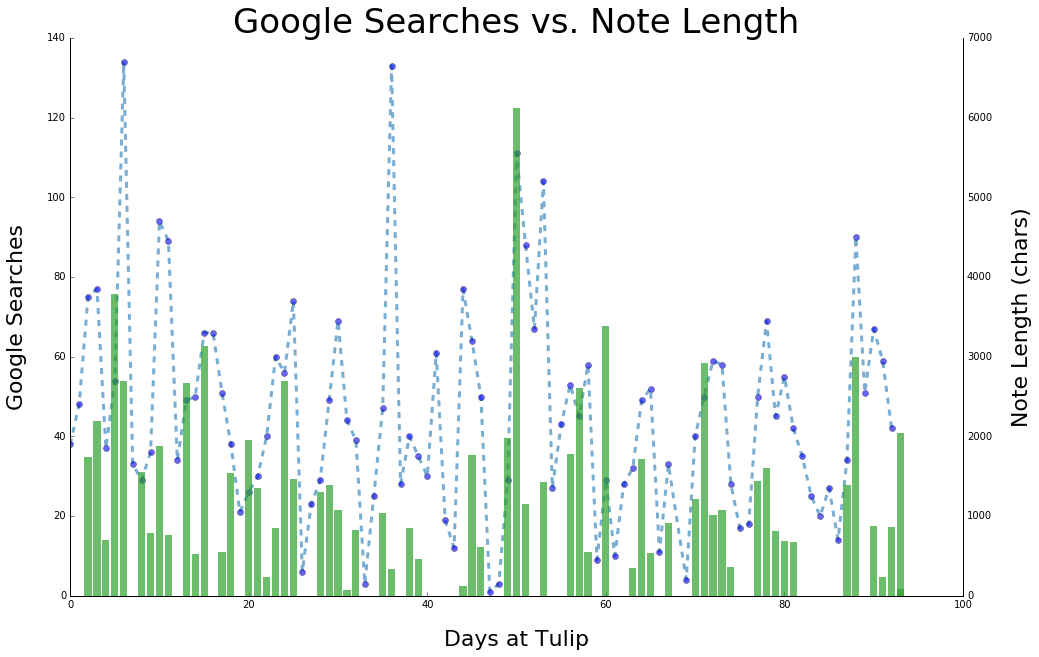

In [8]:
# Plot google searches
ax3 = plt.subplot(111)
ax3.plot(days, frequencies, color=blue, linestyle='dashed', marker='o', 
         alpha=0.6, linewidth=3, markerfacecolor='blue')
plt.xlabel('Days at Tulip', size=22, labelpad=20)
plt.ylabel('Google Searches', size=22, labelpad=20)
plt.title('Google Searches vs. Note Length', size=34)
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.axes().xaxis.set_ticks_position('bottom')
plt.axes().yaxis.set_ticks_position('none')

# Plot note length
ax3_other = ax3.twinx()
ax3_other.bar(dates, note_content_lengths, color=green, align='center', alpha=0.7, linewidth=0, width=.8)
ax3_other.set_ylabel('Note Length (chars)', size=22, labelpad=20)

# Make it pretty
ax3_other.spines['top'].set_visible(False)
ax3_other.xaxis.set_ticks_position('bottom')
ax3_other.yaxis.set_ticks_position('none')

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

Nope. Although the note data and the google searches were definitely correlated, I didn't get anywhere close to the results I was expecting. It seemed like the length of my note entries were pretty much constant throughout. On second thought, doesn't that mean that I was encountering new challenges and learning new things constantly? It was about midnight, I was really tired, and I could have stopped here. In fact, I probbably should have stopped here, but at this point I was hooked. I had one last idea and I had to try it out.

## Commits


For non-technical folk, is a commit a neat little package that contains all the lines of code you've changed in a project since the last commit. Think save points, like in Pokemon. I was hoping that by looking at the size and frequency of commits, maybe I could paint a larger picture about my learning experience.

Commits are definitely not a perfect metric. They don't track the 4 hours you spent digging through your codebase trying to find a mystery bug, only to realize that the issue came from an undocumented bug in some third-party library, and all you had to do was make a 1-line change by calling a different function. That just looks like one, tiny commit.

Still, I was hopeful that when viewed cohesively, these commits could tell a powerful story, and using some git/bash-fu, I was able to collect my entire commit history as a nice little log file.

```bash
# getDiffs.sh
cd $tul
git log --author="Jonah" --date=unix --pretty=format:"%ad,%s" > tmp1.txt
git log --shortstat --author="Jonah" --pretty=tformat:"" | awk '{print $4}' > tmp2.txt
paste -d, tmp1.txt tmp2.txt
rm tmp1.txt tmp2.txt
cd -
```


On a side note, pre-summer me would have thought that this script was magic. Post-summer me **wrote** this bad boy.

Anyways, the output of the above file looks like this:

```
1503093378,Analytics: Add last_n_working days and is_working_day metrics,1894
1502998226,Clean up builder_utils,51
1502982424,YEAR CALENDAR: Add rule for observed holidays,153
...
```
Each line contains the time (in microseconds since January 1st, 1970), name, and lines of code modified for each commit. Then, I just needed to load them into a Python environment for plotting.

In [11]:
diff_data = []

with open('diffs.log') as f:
    diff_data = [tuple(i[:-1].split(',')) for i in f]

dates = []
sizes = []
for d in diff_data:
    (unix_time, _, LOC_changed) = d
    diff_date = datetime.fromtimestamp(float(unix_time)) -  timedelta(hours=4)
    dates.append(diff_date.date())
    sizes.append(LOC_changed)

dates, sizes =  zip(*sorted(zip(dates, sizes)))

print 'Loading', len(dates), 'commits'

Loading 30 commits


Unfortunately, this was the easy part. All I wanted was a nice, simple view, showing when each commit was made and how big each commit was, but nothing I found on the internet really did this. So I, had to write my own.

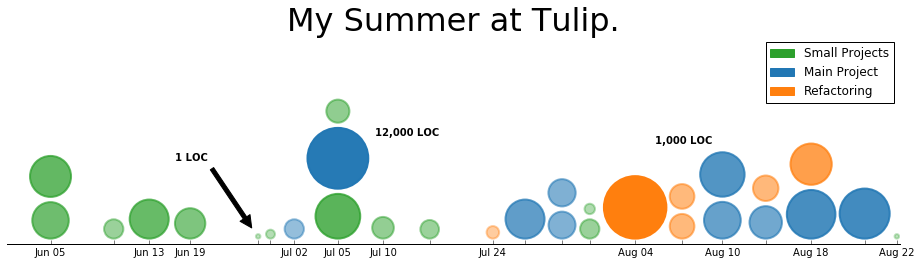

In [21]:
import matplotlib.patches as mpatches
import math
from matplotlib.font_manager import FontProperties
from collections import OrderedDict
    
# set unsorts the items
refined_dates = sorted(list(set(dates)))
# map a date to a position from 0 to 1
def to_rel_pos(dates):
    tulip_start_date = datetime(year=2017, month=5, day=22).timetuple().tm_yday
    relative_days_of_year = [date.timetuple().tm_yday - tulip_start_date for date in dates]
    # requires some shifting so everything fits on the number line
    x_shift = 0.1
    return map(lambda d: float(d)/max(relative_days_of_year)  - x_shift , relative_days_of_year)

tick_labels = [date.strftime('%b %d') for date in refined_dates]
tick_locations = to_rel_pos(refined_dates)
blue = (33/255., 119/255., 180/255.)
orange = (255/255., 127/255., 14/255.)

fig, ax4 = plt.subplots() 

# turns a list x y pairs into a dict of x to corresponding ys
# eg xs=[1, 1, 3], ys=['a', 'b', 'c']. Output={1: ['a', 'b'], 2: ['c']}
def groupByXs(xs, ys):
    # Group the dates by day
    output = OrderedDict()
    for (x,y) in zip(xs,ys):
        if x in output:
            output[x].append(y)
        else:
            output[x] = [y]
    return output

ymax = 0.25
xmax = 1.075
space_between_y = ymax/40
space_between_x = xmax/270

# pads the distance between circles in the x direction so that they have a minimum distance
def getPaddedXs(xs, rs, min_x_dist):
    # create a map of x: [corresponding rs at the same x] 
    xToRs = groupByXs(xs, rs)
    xToNewX = OrderedDict()
    last_x, last_rs = xToRs.popitem(last=False)
    xToNewX[last_x] = last_x
    # iterate through each item and verify it has a distance from the last pair
    for (x, rs) in xToRs.iteritems():
        # make sure we're on a different column
        if x is not last_x:
            xToNewX[x] = x
            right_edge_of_prev = last_x + max(last_rs)
            left_edge = x - max(rs)
            while (left_edge - right_edge_of_prev) < min_x_dist:
                # set x to the min distance
                # x - r = min_x_dist, so 
                xToNewX[x] = xToNewX[x] + min_x_dist
                right_edge_of_prev = last_x + max(last_rs)
                left_edge = xToNewX[x] - max(rs)

            last_x, last_rs = xToNewX[x], rs
        
    return xToNewX

# Calculates the height of circles from their x position and radii
def getCircleHeights(xs, rs):
    xToRs = groupByXs(xs, rs)
    ys = []
    for (x, rs) in xToRs.iteritems():
        ypos = 0
        for r in rs:
            ypos += space_between_y + r
            ys.append(ypos)
            ypos += r
    return ys          
            

def circlePlot(xs, rs, colors):
    ys = getCircleHeights(xs, rs) 
    for (x, y, r, color) in zip(xs, ys, rs, colors):
        min_opacity = 0.3
        m = (1 - min_opacity)/(max(rs) - min(rs))
        b = min_opacity - m*min(rs)
        circle = plt.Circle((x, y), r, alpha=(b + m*r), color=color, lw=2)
        plt.axes().add_artist(circle)

# Scale down the circle radii logarithmically
radii = [(math.log(float(r0)+1.0, 1.10))/2705.0  for r0 in sizes]

# shift the circles over so they don't overlap
xToNewX = getPaddedXs(to_rel_pos(dates), radii, space_between_x)
new_xs = [xToNewX[x] for x in to_rel_pos(dates)]

green = (44/255., 160/255., 44/255.)
blue = (33/255., 119/255., 180/255.)
orange = (255/255., 127/255., 14/255.)
colors = [green,  green,  green,  green,  green, 
          green,  green,  blue,   green,  blue,  
          green,  green,  green,  orange, blue, 
          blue,   blue,   green,  green,  orange, 
          orange, orange, blue,   blue,   blue, 
          orange, blue,   orange, blue,   green]

# Plot the circles
circlePlot(new_xs, radii, colors)

# Remove some tick labels
tick_labels[1] = ''
tick_labels[4] = ''
tick_labels[5] = ''
tick_labels[9] = ''
tick_labels[11] = ''
tick_labels[12] = ''
tick_labels[13] = ''
tick_labels[15] = ''
tick_labels[17] = ''
tick_labels[19] = ''

font = FontProperties()
font.set_weight('bold')

# format it so it looks like a number line
plt.xticks([xToNewX[l] for l in tick_locations], tick_labels)
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.axes().spines['left'].set_visible(False)
plt.yticks([])
plt.axes().xaxis.set_ticks_position('bottom')
plt.axes().yaxis.set_ticks_position('none')
plt.axis([0, xmax, 0, ymax])
fig.set_size_inches(16, 16.0/xmax*ymax)
ax4.axis('equal')

green_patch = mpatches.Patch(color=green, label='Small Projects')
blue_patch = mpatches.Patch(color=blue, label='Main Project')
orange_patch = mpatches.Patch(color=orange, label='Refactoring')
plt.legend(handles=[green_patch, blue_patch, orange_patch])

# Add some annotations
plt.axes().annotate('1 LOC', xy=(tick_locations[4]-0.005, 0.015), xytext=(tick_locations[4]-0.1, 0.1),
                    fontproperties=font, arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(tick_locations[8]+0.01, 0.13, '12,000 LOC', fontproperties=font)
plt.text(tick_locations[16]+0.01, 0.12, '1,000 LOC', fontproperties=font)
plt.title('My Summer at Tulip.', size=32)

plt.show()
     

**This is what I was looking for. **


**It was perfect.** 

It told the story of how I started learning about our codebase with a bunch of small, self-contained projects. You can even see the time period that I start working on my main project, which I finally land on July 5th. At that point I had fluent enough to be able to see where code could be made better, and as a result my commits again drop to almost zero while I'm working on a major refactoring which finally lands on August 4th. And, in the last month I really hit my stride and pump out refactorings and updates to my main project consistently up until the last day of my internship.

I was happy. I was looking for something quantitative which I could point to and say **this** is what learning looks like, and I found it. My final presentation ended up consiting of a demo of my major project followed by the story that you just heard, and people loved it! They suggested I put it up online, which is what I'm doing now.

If you think that you might want me as someone on your team, I'm looking for an internship for next summer! My name is Jonah Spear and my email address is str.concat(my_first_name, my_last_name, "512", "@gmail.com"). (if any robot email skimmers are actually parsing this, they probably have bigger things to worry about)

All the code and is available on [Github](https://github.com/Joboman555/Quantifying-A-Summer-of-Learning).